<a href="https://colab.research.google.com/github/claramoreirag/FEUP-NLP-2/blob/main/adu_classifier_hugging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADU Classifier 2.0

## Project Description

In this second assignment, you are challenged to employ Hugging Face transformers for the same classification task as in the first assignment.

You should explore Hugging Face models to find a pre-trained model that is suitable and promising for fine-tuning with data for the ADU type classification task. It should make sense to pick one that has been pre-trained with Portuguese (either in isolation or in a multi-lingual fashion), possibly with data from a similar genre.

As a bonus, you can also employ a domain adaptation approach, by leveraging on the full text of opinion articles made available.

### Our Task: Sequence/Sentence Classification

- [Hugging Face Task Summary Page](https://huggingface.co/docs/transformers/v4.19.2/en/task_summary)

### Portuguese Models Research

#### Articles

- [Hugging Face State of the Art for Portuguese NLP taks](https://medium.com/@pierre_guillou/estado-da-arte-do-nlp-com-as-bibliotecas-transformers-de-hugging-face-e-fastai-v2-992dd1fd3a8)
- [Sentence Classification Task](https://nlp.stanford.edu/projects/snli/)

#### Hugging Face Models Documentation
- [NER Portuguese News](https://huggingface.co/monilouise/ner_news_portuguese) (trained with news for sequence classification -> very similar to our ADU classification task but it's NER...)

- [BERT Portuguese](https://huggingface.co/neuralmind/bert-base-portuguese-cased) (BERT)
- [DistilBERT Portuguese](https://huggingface.co/adalbertojunior/distilbert-portuguese-cased) (BERT)
- [BERT Portuguese - Clustering Sentences](https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin) (BERT)

- [QA Portuguese](https://huggingface.co/pierreguillou/t5-base-qa-squad-v1.1-portuguese) (QA - not useful)
- [NER Portuguese Legal Texts](https://huggingface.co/pierreguillou/ner-bert-large-cased-pt-lenerbr) (NER - not useful)
- [GPortuguese-2](https://huggingface.co/pierreguillou/gpt2-small-portuguese) (GPT-2 - not useful)
- [Portuguese T5 - PTT5](https://huggingface.co/unicamp-dl/ptt5-base-portuguese-vocab) (T5 - not useful)


### [English Base Models Research & Comparison](https://huggingface.co/docs/transformers/v4.19.2/en/model_summary) (for this task and/or trained in Portuguese)

[Multilingual Hugging Face Models](https://huggingface.co/docs/transformers/multilingual)

- [Original GPT](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/openai-gpt): "multitask language modeling/multiple choice classification" - doesn't seem useful to our task - trained to predict next token/exclusively in English

- [GPT-2](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/gpt2): "multitask language modeling/multiple choice classification" - doesn't seem useful to our task - trained to predict next token/exclusively in English

- [XLNet](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/xlnet): "language modeling, token classification, **sentence classification**, multiple choice classification and question answering." - has a version for our task - trained to predict next token/exclusively in English

- [BERT](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/bert): "language modeling (traditional or masked), next sentence prediction, token classification, **sentence classification**, multiple choice classification and question answering" - has a version for our task - trained to predict original sentence or if sentences are consecutive/**several languages used for training**

- [ALBERT](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/albert): "masked language modeling, token classification, **sentence classification**, multiple choice classification and question answering" - has a version for our task - trained to predict original sentence or ordering of sentences/exclusively in English

- [RoBERTa](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/roberta): "masked language modeling, token classification, **sentence classification**, multiple choice classification and question answering" - has a version for our task - same as BERT training but better/exclusively in English

- [DistilBERT](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/distilbert): " masked language modeling, token classification, **sentence classification** and question answering" - has a version for our task - same as BERT but smaller/exclusively in English

- [ConvBERT](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/convbert): "masked language modeling, token classification, **sentence classification** and question answering" - has a version for our task - same as BERT but quicker/exclusively in English

- [XLM](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/xlm): "language modeling, token classification, **sentence classification** and question answering" - has a version for our task - trained for translation language modeling/**several languages used for training**

- [XLM-RoBERTa](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/xlm-roberta): "masked language modeling, token classification, **sentence classification**, multiple choice classification and question answering" - has a version for our task - trained for masked language modeling/**several languages used for training (more than XLM)**

- [FlauBERT](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/flaubert):"language modeling and **sentence classification**" - has a version for our task -  trained as RoBERTa but without the sentence ordering prediction/exclusively in English

- [ELECTRA](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/electra): "masked language modeling, token classification and **sentence classification**" - has a version for our task - "transformer model pretrained with the use of another (small) masked language model"/exclusively in English

- [Funnel Transformer](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/funnel): "masked language modeling, token classification, **sentence classification**, multiple choice classification and question answering" - has a version for our task - "same pretraining objective as ELECTRA"/exclusively in English

- [Longformer](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/longformer) (needs context aka domain adaptation): "masked language modeling, token classification, **sentence classification**, multiple choice classification and question answering"- has a version for our task - "pretrained the same way a RoBERTa otherwise"/exclusively in English


In [2]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd gdrive/My Drive/NLP

/content/gdrive/My Drive/NLP


### Imports

In [ ]:
!pip install datasets
!pip install pandas
!pip install transformers
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sb
import torch
from matplotlib import pyplot as plt
from datasets import Dataset
from datasets import DatasetDict
from sklearn import preprocessing

### Getting the Data

For simplicity reasons, and to avoid duplicated code, you may check a throughout analysis of this dataset in the previous version of this project's [notebook](https://github.com/flaviacarvalhido/FEUP-NLP/blob/master/adu-classifier.ipynb). In this notebook, only the ambiguous features of the dataset will be displayed, as to justify future preprocessing steps applied to the dataset. Between those ambiguous features, one stands out: the presence of different labels for the same ADU.

In [ ]:
# reading the datasets
articles = pd.read_excel('./OpArticles/OpArticles.xlsx')
adus = pd.read_excel('./OpArticles/OpArticles_ADUs.xlsx')
df= pd.read_excel('./OpArticles/OpArticles_ADUs.xlsx')

Get all the ADUs labelled by more than one annotator

In [ ]:
repADUs = adus[adus.duplicated(
    ['ranges', 'article_id'], keep=False)].sort_values(by=['ranges'])
repADUs

,article_id,annotator,node,ranges,tokens,label
3428,5cf47371896a7fea06009c23,B,0,"[[0, 101]]",A fase da desconfiança em relação à sobrevivên...,Value
3444,5cf47371896a7fea06009c23,C,0,"[[0, 101]]",A fase da desconfiança em relação à sobrevivên...,Value
3426,5cf47371896a7fea06009c23,A,6,"[[0, 101]]",A fase da desconfiança em relação à sobrevivên...,Value
1654,5d04c505896a7fea06a0fabc,A,0,"[[0, 104]]",Em dezembro do ano passado Fernando Medina ava...,Value
1669,5d04c505896a7fea06a0fabc,B,0,"[[0, 104]]",Em dezembro do ano passado Fernando Medina ava...,Fact
...,...,...,...,...,...,...
9126,5cf462de896a7fea06ff9495,C,3,"[[998, 1032]]",a violência agravou-se brutalmente,Value(-)
9146,5cf462de896a7fea06ff9495,D,6,"[[998, 1032]]",a violência agravou-se brutalmente,Fact
15430,5cde31c4896a7fea063370a5,A,7,"[[998, 1044]]",os governos desconhecem a realidade desportiva,Value(-)
15449,5cde31c4896a7fea063370a5,B,7,"[[998, 1044]]",os governos desconhecem a realidade desportiva,Value


Get the rows where the same ADUs got a different label

In [ ]:
difADUs = repADUs.drop_duplicates(
    subset=['article_id', 'ranges', 'label']).sort_values(by=['ranges'])
difADUs


,article_id,annotator,node,ranges,tokens,label
3428,5cf47371896a7fea06009c23,B,0,"[[0, 101]]",A fase da desconfiança em relação à sobrevivên...,Value
1654,5d04c505896a7fea06a0fabc,A,0,"[[0, 104]]",Em dezembro do ano passado Fernando Medina ava...,Value
1669,5d04c505896a7fea06a0fabc,B,0,"[[0, 104]]",Em dezembro do ano passado Fernando Medina ava...,Fact
6587,5cf4675d896a7fea06ffe0fe,C,0,"[[0, 105]]",Já lá vão uns valentes séculos desde que o Mar...,Fact
4654,5cf47065896a7fea060065b5,C,1,"[[0, 108]]",As instituições de ensino superior portuguesas...,Value(+)
...,...,...,...,...,...,...
5481,5cf46c00896a7fea06002671,C,13,"[[997, 1072]]",que disponibilize os resultados da investigaçã...,Policy
9104,5cf462de896a7fea06ff9495,B,5,"[[998, 1032]]",a violência agravou-se brutalmente,Value(-)
9146,5cf462de896a7fea06ff9495,D,6,"[[998, 1032]]",a violência agravou-se brutalmente,Fact
15430,5cde31c4896a7fea063370a5,A,7,"[[998, 1044]]",os governos desconhecem a realidade desportiva,Value(-)


Get all tokens in which there were different labels assigned

In [ ]:
difADUs[difADUs.duplicated(['article_id', 'ranges'],
                           keep=False)].sort_values(by=['ranges'])

,article_id,annotator,node,ranges,tokens,label
1654,5d04c505896a7fea06a0fabc,A,0,"[[0, 104]]",Em dezembro do ano passado Fernando Medina ava...,Value
1669,5d04c505896a7fea06a0fabc,B,0,"[[0, 104]]",Em dezembro do ano passado Fernando Medina ava...,Fact
4654,5cf47065896a7fea060065b5,C,1,"[[0, 108]]",As instituições de ensino superior portuguesas...,Value(+)
4691,5cf47065896a7fea060065b5,D,0,"[[0, 108]]",As instituições de ensino superior portuguesas...,Value
15413,5cddb333896a7fea062e8b18,B,0,"[[0, 109]]",Uma olimpíada da ciência da União Europeia ser...,Value(+)
...,...,...,...,...,...,...
5481,5cf46c00896a7fea06002671,C,13,"[[997, 1072]]",que disponibilize os resultados da investigaçã...,Policy
9104,5cf462de896a7fea06ff9495,B,5,"[[998, 1032]]",a violência agravou-se brutalmente,Value(-)
9146,5cf462de896a7fea06ff9495,D,6,"[[998, 1032]]",a violência agravou-se brutalmente,Fact
15430,5cde31c4896a7fea063370a5,A,7,"[[998, 1044]]",os governos desconhecem a realidade desportiva,Value(-)


### Pre-Processing & Train-Test-Valid Split

Function to drop the ambiguous ADUs, which has been proven have a negative effect on the performance of the models.

In [ ]:
def dropAmbiguousADUs(df):
    aux = df[df.duplicated(['ranges', 'article_id'], keep=False)].sort_values(
        by=['article_id', 'ranges'])
    aux = aux.drop_duplicates(subset=['article_id', 'ranges', 'label'], keep=False).sort_values(
        by=['article_id', 'ranges'])
    aux.index.name = 'id'
    tabuIndexes = aux.index.values
    label_encoder = preprocessing.LabelEncoder()

    cleandf = df.drop(tabuIndexes)
    cleandf.drop(['article_id',	'annotator',	'node',	'ranges'	], axis = 1, inplace = True) 
    cleandf['label']= label_encoder.fit_transform(cleandf['label'])
    return cleandf


Let's use it!

In [ ]:
cleandf = dropAmbiguousADUs(df)

We must tranform the original dataset into a Hugging Face Dataset, to easily apply the transformers.

In [ ]:
dataset_hf = Dataset.from_pandas(cleandf)

Moving on to perform the dataset split operation, into 3 different parts: train, test and validation.

In [ ]:
# 80% train, 20% test+validation
train_test = dataset_hf.train_test_split(test_size=0.2)

# Split the 20% test+validation set in half test, half validation
valid_test = train_test['test'].train_test_split(test_size=0.5)

# gather everyone if you want to have a single DatasetDict
train_valid_test_dataset = DatasetDict({
    'train': train_test['train'],
    'validation': valid_test['train'],
    'test': valid_test['test']
})

train_valid_test_dataset

DatasetDict({
    train: Dataset({
        features: ['tokens', 'label', '__index_level_0__'],
        num_rows: 10982
    })
    validation: Dataset({
        features: ['tokens', 'label', '__index_level_0__'],
        num_rows: 1373
    })
    test: Dataset({
        features: ['tokens', 'label', '__index_level_0__'],
        num_rows: 1373
    })
})

### Extra: Domain Adaptation

In [ ]:
# TODO: use the "articles" dataset for context in certain models (like Longformer or a better one - trained in Portuguese)

### Pre-trained Models & Tokenizers chosen

Let's load the pre-trained tokenizers that we wish to use for this task, chosen from the list above.

In [ ]:
# TODO: i suggest NER Portuguese News, XLM or XLM-RoBERTa and Longformer for Domain Adaptation

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-multilingual-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

### Tokenizing

The following 2 cells will tokenize the entire dataset and encove each token to an ID, according to each model tokenizing process.

In [ ]:
# TODO: one preprocess function for each model (or just one that recieves different tokenizers as arguments)

def tokenizer_processing(sample):
    return tokenizer(sample["tokens"], truncation=True)

In [ ]:
tokenized_dataset = train_valid_test_dataset.map(
    tokenizer_processing, batched=True)

  0%|          | 0/11 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

### Loading the Models

In [ ]:
from transformers import AutoModel,  AutoModelForSequenceClassification

model =  AutoModelForSequenceClassification.from_pretrained('distilbert-base-multilingual-cased', from_tf=True, num_labels=5)

Downloading:   0%|          | 0.00/869M [00:00<?, ?B/s]

All TF 2.0 model weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use DistilBertForSequenceClassification for predictions without further training.


### Applying the Models

### Fine-tuning

In [ ]:
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorWithPadding
from datasets import load_metric

import numpy as np

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch", # run validation at the end of each epoch
    save_strategy="epoch",
    load_best_model_at_end=True,
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: tokens, __index_level_0__. If tokens, __index_level_0__ are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 10982
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 2061


Epoch,Training Loss,Validation Loss,Accuracy
1,1.176800,1.013748,0.608157
2,0.954200,0.945003,0.648944
3,0.667600,0.952475,0.659869


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: tokens, __index_level_0__. If tokens, __index_level_0__ are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1373
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-687
Configuration saved in ./results/checkpoint-687/config.json
Model weights saved in ./results/checkpoint-687/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-687/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-687/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: tokens, __index_level_0__. If tokens, __index_level_0__ are not expected by `DistilBertForSequenceClassification.forward`,  you can

TrainOutput(global_step=2061, training_loss=0.8944408651811876, metrics={'train_runtime': 290.1396, 'train_samples_per_second': 113.552, 'train_steps_per_second': 7.103, 'total_flos': 492019554724920.0, 'train_loss': 0.8944408651811876, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: tokens, __index_level_0__. If tokens, __index_level_0__ are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1373
  Batch size = 16


{'epoch': 3.0,
 'eval_accuracy': 0.6489439184268027,
 'eval_loss': 0.945002555847168,
 'eval_runtime': 2.7063,
 'eval_samples_per_second': 507.34,
 'eval_steps_per_second': 31.778}

In [ ]:
trainer.predict(test_dataset=tokenized_dataset["test"])

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: tokens, __index_level_0__. If tokens, __index_level_0__ are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1373
  Batch size = 16


PredictionOutput(predictions=array([[ 0.90903676, -3.037459  ,  1.6207116 , -1.5537072 ,  1.0332884 ],
       [-0.01315412, -2.59649   ,  2.6239517 , -1.325147  ,  0.3860615 ],
       [-0.00812558, -2.827085  ,  1.5502201 , -0.8646263 ,  1.7394766 ],
       ...,
       [ 1.662516  , -2.3834374 ,  0.2276568 , -1.5509903 ,  1.123817  ],
       [-0.41366288, -2.5349507 ,  2.598612  , -0.15542163, -0.03824234],
       [-1.2430804 , -0.0982627 ,  1.8969982 , -0.01658318, -0.8400357 ]],
      dtype=float32), label_ids=array([4, 2, 0, ..., 0, 2, 2]), metrics={'test_loss': 0.8853636980056763, 'test_accuracy': 0.6715222141296431, 'test_runtime': 2.763, 'test_samples_per_second': 496.922, 'test_steps_per_second': 31.125})

In [ ]:
trainer.save_model()

Saving model checkpoint to ./results
Configuration saved in ./results/config.json
Model weights saved in ./results/pytorch_model.bin
tokenizer config file saved in ./results/tokenizer_config.json
Special tokens file saved in ./results/special_tokens_map.json


### Evaluation

In [ ]:
tokenizer2 = AutoTokenizer.from_pretrained("./results")
model2 = AutoModelForSequenceClassification.from_pretrained("./results", num_labels=5)
y_pred= []
for p in tokenized_dataset['test']['tokens']:
    ti = tokenizer2(p, return_tensors="pt")
    out = model2(**ti)
    pred = torch.argmax(out.logits)
    y_pred.append(pred)   # our labels are already 0 and 1

Didn't find file ./results/added_tokens.json. We won't load it.
loading file ./results/vocab.txt
loading file ./results/tokenizer.json
loading file None
loading file ./results/special_tokens_map.json
loading file ./results/tokenizer_config.json
loading configuration file ./results/config.json
Model config DistilBertConfig {
  "_name_or_path": "./results",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, cohen_kappa_score

y_test = tokenized_dataset['test']['label']

print(confusion_matrix(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1: ', f1_score(y_test, y_pred, average='macro'))

[[182   2  83   8  16]
 [  1  25  17   2   3]
 [ 64  18 534  27  65]
 [ 10   0  32  54   6]
 [ 10   1  82   4 127]]
Accuracy:  0.6715222141296431
Precision:  0.6185408906225514
Recall:  0.5993752450307399
F1:  0.6083896390624234


In [ ]:
def evaluation(y_test, pred):
    report = classification_report(y_test, pred, output_dict=True,zero_division= 0)
    print(f"Report:\n{classification_report(y_test, pred,zero_division= 0)}\n")
    #print(f"AUC Score:\n{roc_auc_score_multiclass(y_test, pred)}\n")
    print(f"Cohen kappa Score:\n{cohen_kappa_score(y_test, pred)}\n")
    sb.set(font_scale=1.0)
    labels=["Fact", "Policy", "Value","Value(+)","Value(-)"];
    i=0;
    cm = confusion_matrix(y_test, pred,labels=[0,1,2,3,4])
    ax = plt.subplot()
    sb.heatmap(cm, annot=True, ax=ax, fmt="g")

    ax.set_xlabel('Predicted');
    ax.set_ylabel('Observed');
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);
    ax.set_title("Confusion Matrix: ");
    plt.show()
    i+=1;


Report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       291
           1       0.54      0.52      0.53        48
           2       0.71      0.75      0.73       708
           3       0.57      0.53      0.55       102
           4       0.59      0.57      0.58       224

    accuracy                           0.67      1373
   macro avg       0.62      0.60      0.61      1373
weighted avg       0.67      0.67      0.67      1373


Cohen kappa Score:
0.49133193465763936



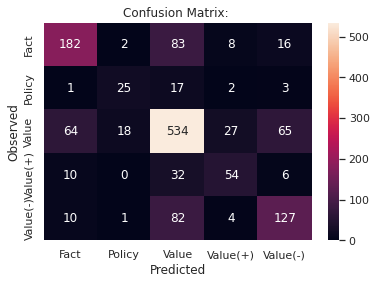

In [ ]:
evaluation(tokenized_dataset['test']['label'],y_pred)

### Conclusion